<a href="https://colab.research.google.com/github/khanhne28/khanh/blob/main/NhanDangCamXuc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
from sklearn.utils import shuffle
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pickle
import tensorflow as tf
import math as m

In [34]:
with open('data2.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

# Reshape Data
x_pre_1 = x_train[19]
x_pre_2 = x_train[37]
x_pre_3 = x_train[55]
x_pre_4 = x_train[77]


# Preprocessing Data
x_train = x_train.astype('float32')
x_train /= 255

# Encoding Y
y_train = np_utils.to_categorical(y_train, 4)

# Shuffe Data
x_train, y_train = shuffle(x_train, y_train)

In [35]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same', input_shape = (150,150,3)))
model.add(Conv2D(32, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(64, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(Conv2D(128, (3,3), activation='relu',kernel_initializer='he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                  

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 10s 10s/step - loss: 1.4315 - acc: 0.3387 - val_loss: 35.2827 - val_acc: 0.2500
Epoch 2/15
1/1 [==============================] - 9s 9s/step - loss: 47.1656 - acc: 0.2419 - val_loss: 17.1681 - val_acc: 0.3125
Epoch 3/15
1/1 [==============================] - 9s 9s/step - loss: 22.2672 - acc: 0.2419 - val_loss: 3.3544 - val_acc: 0.2500
Epoch 4/15
1/1 [==============================] - 9s 9s/step - loss: 4.0769 - acc: 0.3387 - val_loss: 1.8933 - val_acc: 0.2500
Epoch 5/15
1/1 [==============================] - 9s 9s/step - loss: 1.9208 - acc: 0.2419 - val_loss: 1.4281 - val_acc: 0.3750
Epoch 6/15
1/1 [==============================] - 9s 9s/step - loss: 1.3605 - acc: 0.3387 - val_loss: 1.4284 - val_acc: 0.1875
Epoch 7/15
1/1 [==============================] - 9s 9s/step - loss: 1.3764 - acc: 0.2742 - val_loss: 1.4058 - val_acc: 0.1250
Epoch 8/15
1/1 [==============================] - 9s 9s/step - loss: 1.3497 - acc: 0.3387 - val_loss: 1.3907 - val_a

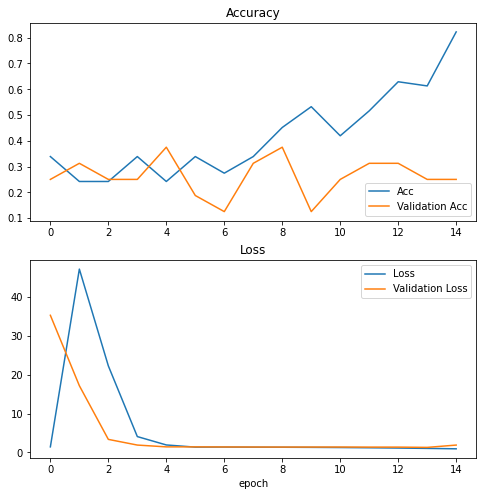

In [36]:
opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['acc'])
his = model.fit(x_train, y_train, epochs = 15, batch_size = 64, validation_split = 0.2) 
plot_history(his)

In [37]:
label = ['Happy', 'Sad', 'Scare', 'Angry']

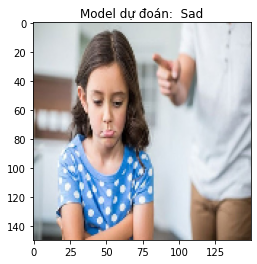

In [38]:

plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_1.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_1, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

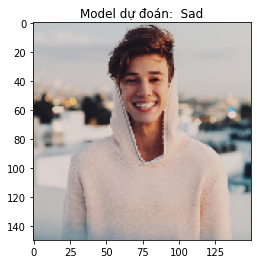

In [39]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_2.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_2, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))


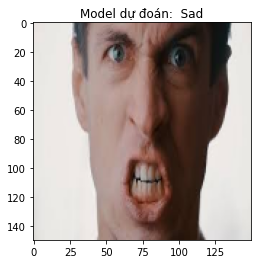

In [40]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_3.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_3, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))

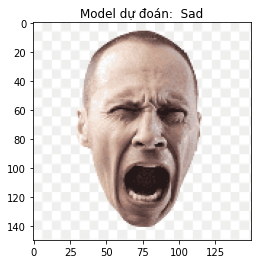

In [41]:
plt.title("Model dự đoán:  " + label[np.argmax(model.predict(x_pre_4.reshape(1,150,150,3)))])
plt.imshow(cv2.cvtColor(x_pre_4, cv2.COLOR_BGR2RGB), cmap=plt.get_cmap('gray'))